<a href="https://colab.research.google.com/github/LilySu/Python_Practice/blob/master/HackerRank_Recursion_Davis_Staircase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Davis has a number of staircases in his house and he likes to climb each staircase , , or  steps at a time. Being a very precocious child, he wonders how many ways there are to reach the top of the staircase.

Given the respective heights for each of the  staircases in his house, find and print the number of ways he can climb each staircase, module  on a new line.

For example, there is  staircase in the house that is  steps high. Davis can step on the following sequences of steps:
```
1 1 1 1 1
1 1 1 2
1 1 2 1 
1 2 1 1
2 1 1 1
1 2 2
2 2 1
2 1 2
1 1 3
1 3 1
3 1 1
2 3
3 2
There are  possible ways he can take these  steps. 

Function Description

Complete the stepPerms function in the editor below. It should recursively calculate and return the integer number of ways Davis can climb the staircase, modulo 10000000007.

stepPerms has the following parameter(s):

n: an integer, the number of stairs in the staircase
Input Format

The first line contains a single integer, , the number of staircases in his house.
Each of the following  lines contains a single integer, , the height of staircase .

Constraints

Subtasks

 for  of the maximum score.
Output Format

For each staircase, return the number of ways Davis can climb it as an integer.

Sample Input

3
1
3
7
Sample Output

1
4
44
Explanation

Let's calculate the number of ways of climbing the first two of the Davis'  staircases:

The first staircase only has  step, so there is only one way for him to climb it (i.e., by jumping  step). Thus, we print  on a new line.
The second staircase has  steps and he can climb it in any of the four following ways:
Thus, we print  on a new line.
```

In [ ]:
#!/bin/python3

import math
import os
import random
import re
import sys

# Complete the stepPerms function below.
def stepPerms(n):
    # if we only have one stair, we can return 1
    
    # what is our basecase? 
    # grab a global variable, keep on adding 1, at the end, its' all set
    # with global variables, they are frowned upon unless a good reason - good for memoization hash, for this we avoid global variable
    # we don't care how many steps it took us to get to that point, we only care how many different ways, counting the number of steps is not useful just number of different ways
    # if we hit 0
    if n == 0:
        # hey we made it up the stairs, return 1
        return 1
    # if we get below 0, 
    if n < 0:
        # just return 0
        return 0
        
    # because we are given path for 1 staircase, we just do that one at a time. Hackerrank is not consistent, for this one  Hackerrank takes care of the looping
    
    # we add everything up, we stack our function calls up, 
    # as we wind down our stack, we accumulate everything
    
    # we try to step 1, 2, or 3 times ( call the function recursively for n-1, n-2, n-3)
    return stepPerms(n - 1) + stepPerms(n - 2) + stepPerms(n - 3)
    # add the results together

# time complexit is O(3 ^ n) because it's a branching problem
# there are 3 branches
# number of branches to the n power
# really really bad
# use memoization

# space complexity is O(n)
# with recursion it's about how deep our call stack is going to get, 
# there are tons of different options, but the call stack is only n deep, 
# since we call n-1 first, when we get down to 0, wwe'll step back 1 
# and go back to the right, it's always n deep, 1 off stack 1 deeper, 
# 1 off stack 1 deeper, never deeper than n into our recursion

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    s = int(input())

    for s_itr in range(s):
        n = int(input())

        res = stepPerms(n)

        fptr.write(str(res) + '\n')

    fptr.close()

memoization allows us to save ones we have already did

the stack that we create for recursion is n deep, but we unravel that sack and go down that path, space complexity would become n with memoization

In [ ]:
# memoization base cases:
# if we hit a 0, there is 1 way to get done with it
# if 1, there is only 1 way to get down from there, 1
# if there are 2 steps, there are 2 ways down, 

# memoization:
memo = {}
memo[0] = 1
memo[1] = 1
memo[2] = 2

# lets start from the other side, if we just had 3 stairs to go up, grab from memo
# we change from recursion to iterating
# similar to fibonachi except without the 3rd one

# start at 3, keep on going up to n, store in our memo
# once we get up, calculate up to n, and store it 
for i in range(3, n + 1):
    memo[i] = memo[i - 1] + memo[i - 2] + memo[i - 3]
return memo[n]


# O(n) time , O(n) space - we store 1 value for each number

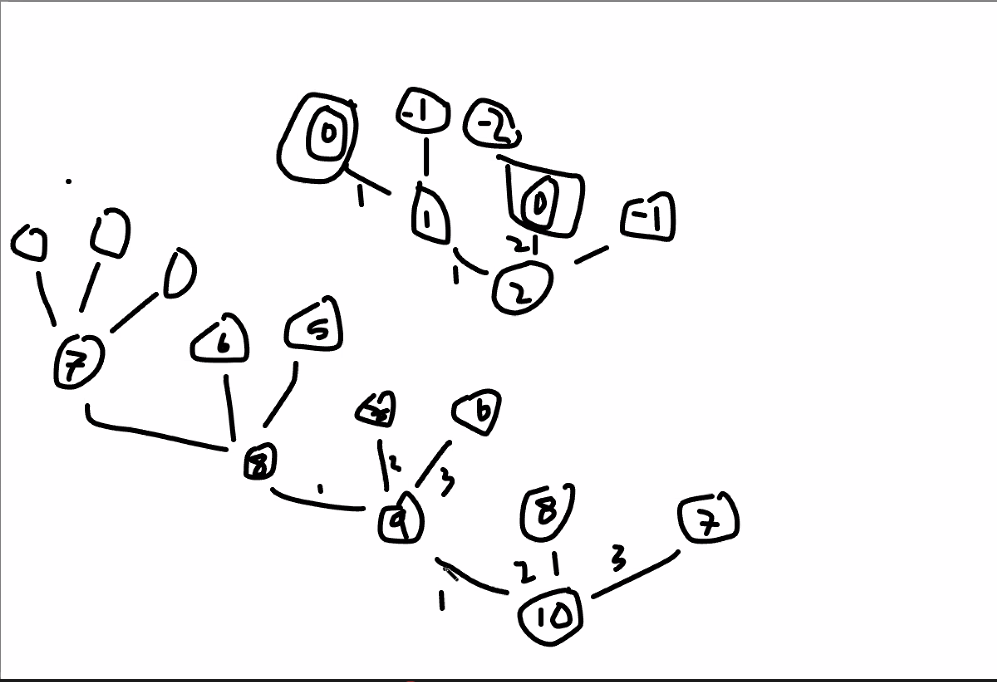

In [ ]:
# we create a global variable - 
# every time we call this, we already have our cache for the next problem
# consolidate base case
# sometimes you put your base cases in memoization
# this is the end of the graph, 1 of the ways to get down the stairs
# if we have a 1 in our graph, if we keep on doing recursion, there is just 1 way down
# if we look at 2 as a node in our graph, we have 2 ways down
memo = {0:1, 1:1, 2:2}
def stepPerms(n):
    if n is not in memo:
        memo[n] = stepPerms(n - 1) + stepPerms(n - 2) + stepPerms(n - 3)
    return memo[n]
# O(n) time complexity
# anytime we call recursion, we already know what the branches 
# space O(2n) -> O(n)

# or we can use lru cache

    # # # memo = {} # this works too, but not as efficient
    # # memo[0] = 1
    # # memo[1] = 1
    # # memo[2] = 2
    # # this can be our base case now, we will not hit negative number, no need for n < 0 check
    # if n in memo:
    #     return memo[n]
    # # if not in memo
    # memo[n] = stepPerms(n - 1) + stepPerms(n - 2) + stepPerms(n - 3)
    # return memo[n]
    # # setup memo
    # stepPermsRecursive(n, memo)
    # # call recursive version
